# STOCK ANALYSIS

In this project we focus on the six different stocks: Apple, Meta, Pfizer, Novo Nordisk, Credit Suisse, and Danske Bank. We investigate past performance and correlation. We discuss the patterns.

Imports and set magics - make sure to have the required installations. 

In [1]:
# Import numpy, pandas, datetime and matplotlib
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


# Import Yahoo Finance API
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

# Read and clean data

We import our data from the Yahoo Finance API. As we are only interested in the adjusted close price, we get rid of the columns that follows as a standard procedure when using this API. Further, we want a dataset without empty cells. As the US market and European market have slightly different trading days, our dataset contains dates with only prices from the US market and vice versa. Hence, we get rid of rows that does not contain a price for each stock. 

In [4]:

# Function used to retreive data from Yahoo Finance through the API for specified stock (ticker) and date interval
def GetStockData(ticker,start,end):

    # Creating a data from with stock data for the ticker and date interval
    df = pdr.get_data_yahoo(ticker, start=start, end=end)

    # Return datafrome
    return df
    
 # Function used for getting data from multiple tickers (defined in list)
def GetMultipleStock(tickers):

    # Creating an empty dataframe
    stockdata = pd.DataFrame()

    # Iterate over list of tickers (argument)
    for i in tickers:

        # Calling the GetStockData function to retreive data through the API
        df = GetStockData(i,start_date,end_date)

        # Transforming the data: Keeping the adjusted closing price and renaming it the ticker name, and dropping the other data points.
        df.rename(columns = {'Adj Close': i}, inplace = True)
        df.drop(['Open','High','Low','Close','Volume'], axis=1, inplace = True)

        # Joining the data for the specific ticker in a combined dataframe
        if stockdata.empty:
            stockdata = df
        else:
            stockdata = stockdata.join(df, how='outer')

        # Drop rows containing NaN values
        stockdata.dropna(inplace = True)

    # Return the combined dataframe containing the pice data for the list of tickers
    return stockdata

## The dataset visualized

At first we explore how the stock prices have developed since 01-01-2020 to 01-03-2023. We choose this timeperiod as it includes the coronavirus period and the russian invasion of Ukraine. 

The graph below gives an overall impression of the stock performance and co-movements. To do so, we calculate an index starting in year 2020. We include a line showing the rolling average. 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


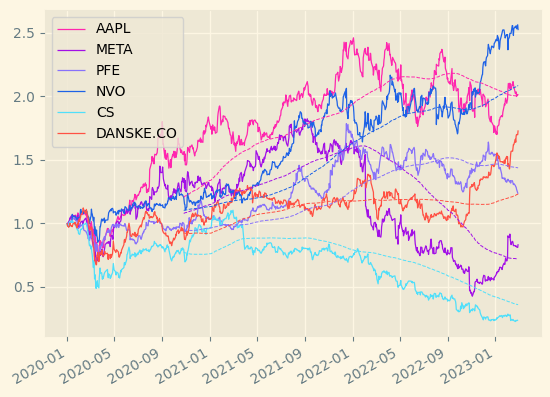

In [6]:
# Specify tickers and stat and end dates
tickers = ['AAPL','META','PFE','NVO','CS','DANSKE.CO']

# Start and end date used to define the date interval when calling the API
start_date = '2020-1-1'
end_date = '2023-3-1'

# Call function to receive stockprices
import DataProject
from DataProject import GetMultipleStock
data = GetMultipleStock(tickers)

# Styling the plots globally
style = 'Solarize_Light2'
plt.style.use(style)

# Indexing the price data and adding a rolling average (200 days)
index_plot = data.apply(lambda x: x / x[0])
index_plot_moving = index_plot.rolling(200).mean()

# Plotting the indexed price data as well as the rolling average in the same graph
ax = index_plot.plot(linewidth = 0.9, color=['#FF26AE', '#A210E6', '#8871FA', '#1E62E6', '#50DFFA', '#FF5144'], xlabel='')
index_plot_moving.plot(ax=ax, linestyle = '--', linewidth = 0.7, legend=None,color=['#FF26AE', '#A210E6', '#8871FA', '#1E62E6', '#50DFFA', '#FF5144'], xlabel='')
plt.show()

We see that the Novo Nordisk stock has performed best in the period, especially in the recent half year. In the other end we find the Credit Suisse stock. At first glance, we also notice some periods with similiar movements across the stocks. For example, follwing the Russian invasion in Ukraine the market dropped in general. Likewise when the corona virus hit the world.

# Daily returns

We calculate the daily returns to create a histogram showing the volatility of the returns. 

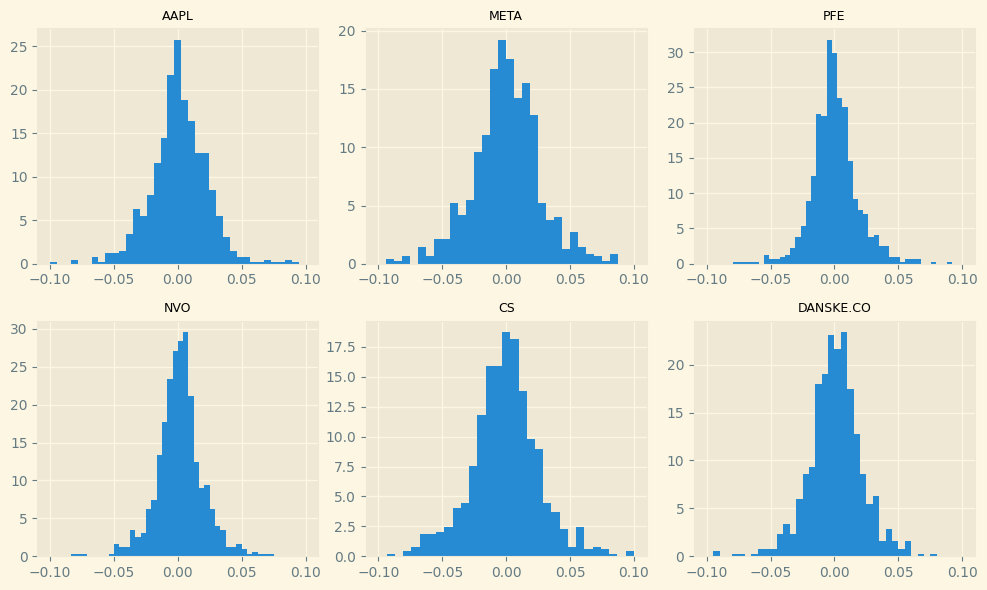

In [7]:
# Calculating the dayly returns
dayly_returns = data.pct_change()

plt.figure(figsize=(10,6))
# Plotting the dayly returns for each ticker i seperate histograms but in the same figure, using subplots
for i, col in enumerate(tickers):
    plt.subplot(2, 3, i + 1)
    plt.hist(dayly_returns[col], range=[-0.1, 0.1], density=True, bins='auto')
    plt.title(col, fontsize = 9)
plt.tight_layout()
plt.show()

We see from the figure above that especially the Pfizer and Novo Nordisk stock are less volatile and the Meta and Credit Suisse stock are most volatile.

# Correlation matrix

To elaborate on the visualized co-movements of the stocks, we create an correlation matrix. 

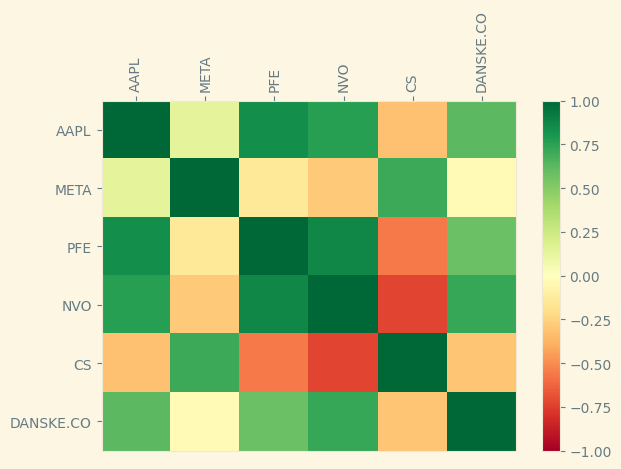

In [9]:
# Calculating the correlation between each ticker
data_corr = data.corr()

# Plot the correlations in a matrix
data_heat = data_corr.values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
heatmap = ax.pcolor(data_heat, cmap = plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data_heat.shape[0]) + 0.5, minor = False)
ax.set_yticks(np.arange(data_heat.shape[1]) + 0.5, minor = False)
ax.invert_yaxis()
ax.xaxis.tick_top()
column_labels = data_corr.columns
row_labels = data_corr.index
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation = 90)
heatmap.set_clim(-1, 1)
plt.tight_layout()
plt.style.use(style)
plt.show()

In general the six stocks are positive correlated, but the Credit Suisse stock are negatively correlated with all expect the Meta stock. The positive correlation with the Meta stock is somewhat surprising. We would expect stocks in the same segment to be ccorrelated and vice versa, but we see that the Credit Suisse stock is negatively correlated with Danske Bank. On the other hand, the Novo Nordisk stock and the Pfizer stock are highly positive correlated.

# Conclusion

Through various analytical procedures, we compared the performance of six stocks - Apple, Meta, Pfizer, Novo Nordisk, Credit Suisse, and Danske Bank - during the period from January 1, 2020, up until today. We found that Novo Nordisk's and Apple's overall price developments outperformed the other stocks, especially Meta and Credit Suisse. Looking at the volatility, Novo Nordisk and Pfizer yielded the most stable returns, while Credit Suisse and Meta were the most volatile. Finally, the six stocks proved to be quite intertwined and affected by the same underlying factors, as their mutual correlation, in general, was positive - although we found some interesting deviations. Especially, Credit Suisse and Danske Bank were negatively correlated, even though they are in the same industry.